In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

Matplotlib created a temporary cache directory at /tmp/matplotlib-he4ujvds because the default path (/home/jupyter-ikharitonov/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
path = Path.home()/'RANCZLAB-NAS/iakov/produced/mnist_sequence_checkpoints/SNN1_mnist_sequences_250hz'

In [17]:
dirlist = os.listdir(path)

In [18]:
dirlist[dirlist.index('config2')] = 'config2_'
dirlist[dirlist.index('config1')] = 'config1_'
dirlist[dirlist.index('config27_config8_LRx0,01')] = 'config27_likeconfig8_LRx0,01'
dirlist[dirlist.index('E_config26_config8_LRx0.1')] = 'E_config26_config8_LRx0.1'
dirlist

['E_config26_config8_LRx0.1',
 'config5_post',
 'config14_rheo1_post',
 'config16_rheo1_L2_0.1',
 'config31_rheo0.98',
 'config10_rheobase_0.7',
 'E_config11_rheobase_0.8',
 'config29_rheo0.94',
 'config13_rheobase_0.1',
 'config33_rheo1.1',
 'config19_rheo1_high_lr',
 'config27_likeconfig8_LRx0,01',
 'config30_rheo0.96',
 '.ipynb_checkpoints',
 'E_config28_rheo0.92',
 'E_config21_rheo1_pretrained',
 'config6_sgd',
 'config32_rheo1',
 'config24_rheo1.01',
 'config22_rheobase_2',
 'config4_starting_high',
 'E_config18_rheo1_high_lr',
 'config25_rheo1.02',
 'config17_rheo1_L2_1',
 'config8_rheobase_1',
 'config7_input_strength_exp1',
 'E_config20_clipped_config12',
 'config3_harsh_steplr',
 'E_config9_rheobase_0.9',
 'config23_rheo0.99',
 'E_config12_rheobase_1.54',
 'config34_rheo1.3',
 'config15_rheo0.1_post']

In [19]:
good_configs = [13,10,31,23,8,32,24,25,33,22]

In [20]:
def parse_config_file(file_path):
    config_dict = {}
    with open(file_path, 'r') as file:
        for line in file:
            key, value = line.strip().split(':')
            key = key.strip()
            value = value.strip()
            if value.isdigit():
                value = int(value)
            elif value.startswith('"') and value.endswith('"'):
                value = value[1:-1]
            config_dict[key] = value
    return config_dict

In [21]:
[f"config{8}" == x.split('_')[0] or f"config{8}" == x.split('_')[1] for x in dirlist].index(True)

24

In [22]:
out_df_dict = {}
for c in good_configs:
    full_config_name = dirlist[[f"config{c}" == x.split('_')[0] or f"config{c}" == x.split('_')[1] for x in dirlist].index(True)]
    print(c, full_config_name)
    out_df_dict[c] = [pd.read_csv(path/full_config_name/'metrics.csv', skiprows=1)]
    out_df_dict[c].append(parse_config_file(path/full_config_name/f'{full_config_name}.txt'))

13 config13_rheobase_0.1
10 config10_rheobase_0.7
31 config31_rheo0.98
23 config23_rheo0.99
8 config8_rheobase_1
32 config32_rheo1
24 config24_rheo1.01
25 config25_rheo1.02
33 config33_rheo1.1
22 config22_rheobase_2


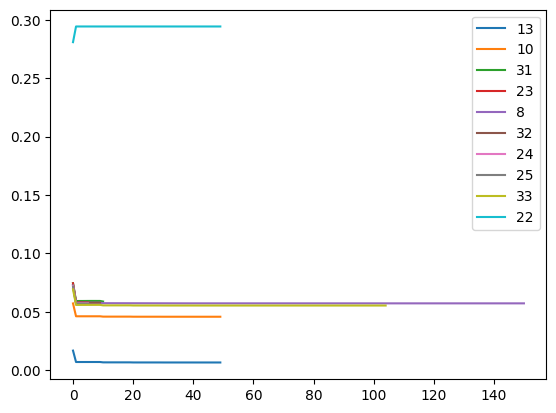

In [23]:
for df in out_df_dict.values():
    df = df[0]
    plt.plot(list(df['Training Loss']))
plt.legend(good_configs)
# plt.xlim([0,10])
plt.show()

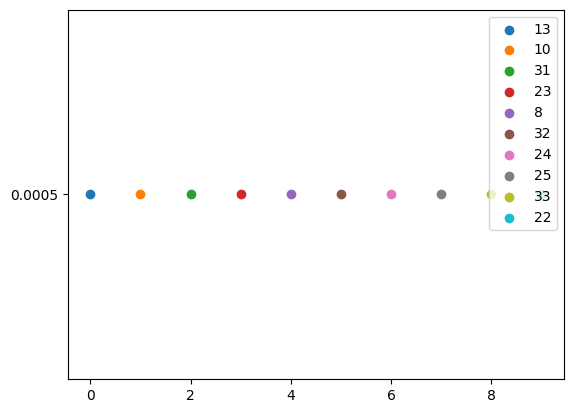

In [24]:
x_vals = [x for x in range(len(good_configs))]
y_vals = [out_df_dict[x][1]['optimiser_learning_rate'] for x in good_configs]
for i in range(len(good_configs)):
    plt.scatter(i, out_df_dict[good_configs[i]][1]['optimiser_learning_rate'])
# plt.scatter(x_vals, y_vals)
plt.legend(good_configs)
plt.show()